In [3]:
#pylab inline imports numpy and matplotlib.pyplot automatically. 
#You can adjust this line depending on your python environment
%pylab inline 
import s17lc

Populating the interactive namespace from numpy and matplotlib


### Getting radius, velocity and radio luminosity vs age for given parameter values

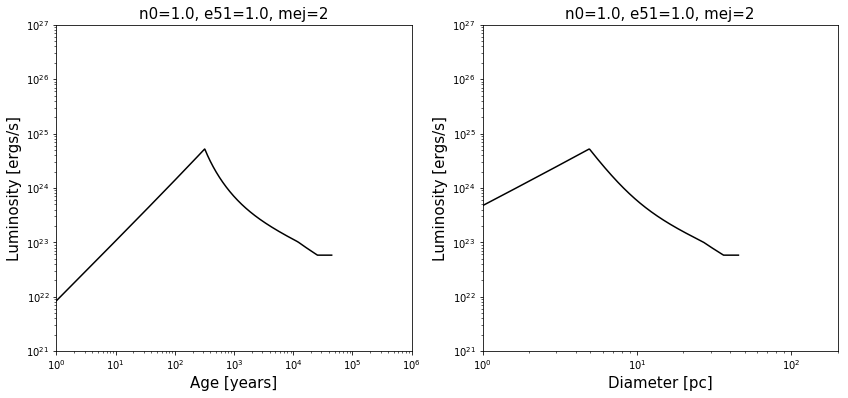

In [6]:
n0 = 1. #atoms/cc
e51 = 1. # in units of 10^51 ergs
mej = 2 #in Msun
p = 2.5 #spectral index of protons
nu = 1.4e9 #Hz
epse = 0.0042 #electron acceleration efficiency

tim = np.logspace(0, 5, 1000)


rs = np.zeros_like(tim)
vs = np.zeros_like(tim)
for i in range(tim.size):
    rs[i], vs[i] = s17lc.radius_velocity(tim[i], n0, mej, e51, sntype='cc')
ls = s17lc.luminosity(rs, vs, n0, epse, p, nu)

ls[vs<200.]=0 #this is from the assumption in the paper that after shock decelerates to 200 km/s, 
              #electrons aren't accelerated efficiently, so no radio emission. 

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title(r'n0={0}, e51={1}, mej={2}'.format(n0, e51, mej), fontsize=15)
plt.plot(tim[ls>0], ls[ls>0], 'k-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=15)
plt.ylabel('Luminosity [ergs/s]', fontsize=15)
plt.xlim(1., 1.0e6)
plt.ylim(1.0e21, 1.0e27)
plt.legend()

plt.subplot(1,2,2)
plt.title(r'n0={0}, e51={1}, mej={2}'.format(n0, e51, mej), fontsize=15)
plt.plot(2.*rs[ls>0], ls[ls>0], 'k-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Diameter [pc]', fontsize=15)
plt.ylabel('Luminosity [ergs/s]', fontsize=15)
plt.xlim(1., 200.)
plt.ylim(1.0e21, 1.0e27)
plt.legend()
plt.show()